In [18]:
# Import Libraries
import os
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import csv
import time
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
nltk.download('punkt') # https://www.nltk.org/data.html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Authentication Keys
# https://developer.twitter.com/en/portal/projects/1268606526274580480/apps/18064440/keys

# Think of these as the user name and password that represents
# your Twitter developer app when making API requests. 
consumerKey = ' '
consumerSecret = ' '

# User-specific credentials used to authenticate OAuth 1.0a API requests. 
# They specify the Twitter account the request is made on behalf of.
accessToken = ' '
accessTokenSecret = ' '

In [3]:
# Create the authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret) 

# Creating the API object while passing in auth information
api = tweepy.API(auth)

In [4]:
# Constants 
START_DATE = '2020-05-01'
TWEET_NUMBER = 100
SEARCH_WORD = '#CRA'
RATE_LIMIT = 180
SLEEP_TIME = 900/180 # 15 minutes = 900 seconds

In [5]:
# Collect tweets using Cursor method
# http://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html

def buildTestSet():
    tweet_list = []
    tweets_fetched = tweepy.Cursor(api.search,
                  q=SEARCH_WORD,
                  lang='en',
                  since=START_DATE).items(TWEET_NUMBER) 

    for tweet in tweets_fetched:
        tweet_list.append({"text":tweet.text, "label":None})
        print(tweet_list)
        
    # Array where Test Set is stored
    return tweet_list

In [19]:
# Build the test set
testDataSet = buildTestSet()

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}]
[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}]
[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

[{'text': '"I am no longer accepting the things I cannot change, I am changing the things I cannot accept."— Angela Davis \n✨ 🔥… https://t.co/EEeAwq7kMv', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': 'RT @maxollieandme: Washable eco cotton face reusable wipes in modern floral design https://t.co/Izl217X71v via @Etsy #HandmadeHour #ListMyE…', 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 'label': None}, {'text': "RT @maxollieandme: Hold this and know I'm with you , isolation mindful lavender or chamomile sachet anxiety selfcare reminder mindfulness l…", 'label': None}, {'text': 'RT @maxollieandme: wheat bag duck #ducks extra large lavender or no lavender wheat bag in cotton mustard fabric https://t.co/orEyVmbaBH via…', 

In [6]:
# data https://github.com/karanluthra/twitter-sentiment-training/blob/master/corpus.csv
# https://www.hugedomains.com/domain_profile.cfm?d=sananalytics&e=com
# https://github.com/shiyanboxer/twitter-sentiment-training
# For this task, we will be using the amazing Niek Sanders’ Corpus of 
# over 5000 hand-classified tweets, which makes it quite reliable. 
# Twitter does not allow storing tweets on a personal device, 
# therefore, the corpus includes a keyword (topic of the tweet), a label (pos/neg) 
# and a tweet ID number for every tweet (i.e. row in our CSV corpus). 

def buildTrainingSet(corpusFile, tweetDataFile):
    corpus = []    
    with open(corpusFile,'rt') as csvfile:
        lineReader = csv.reader(csvfile,delimiter=',', quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id":row[2], "label":row[1], "topic":row[0]})
    print(corpus[0])        
    trainingDataSet = []

    for tweet in corpus:
        try:
            status = api.get_status(tweet["tweet_id"])
            print("Tweet fetched" + status.text)
            tweet["text"] = status.text
            trainingDataSet.append(tweet)
            time.sleep(SLEEP_TIME) 
        except:
            continue
    # now we write them to the empty CSV file
    with open(tweetDataFile,'w') as csvfile:
        linewriter = csv.writer(csvfile,delimiter=',',quotechar="\"")
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["label"], tweet["topic"]])
            except Exception as e:
                print(e)
    # print(trainingDataSet)
    return trainingDataSet

In [12]:
# corpusFile is the string path to the Niek Sanders’ CSV corpus file we downloaded. 
# This file, as mentioned earlier, includes the tweet’s topic, label and id.
# tweetDataFile is the string path to the file we would like to save the full tweets in. 
# In contrast to corpusFile, this file will include every tweet’s text as well as topic, label and id.

corpusFile = "C:\\Users\\shiya\\Documents\\Dev\\Twitter-Sentiment-Analysis\\twitter-sentiment-training-master\\twitter-sentiment-training-master\\corpus.csv"
tweetDataFile = "C:\\Users\\shiya\\Documents\\Dev\\Twitter-Sentiment-Analysis\\twitter-sentiment-training-master\\twitter-sentiment-training-master\\tweetDataFile.csv"

trainingData = buildTrainingSet(corpusFile, tweetDataFile)

{'tweet_id': '126415614616154112', 'label': 'positive', 'topic': 'apple'}
Tweet fetchedNow all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
Tweet fetchedHilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
Tweet fetched@RIM you made it too easy for me to switch to @Apple iPhone. See ya!
Tweet fetchedThe 16 strangest things Siri has said so far. I am SOOO glad that @Apple gave Siri a sense of humor! http://t.co/TWAeUDBp via @HappyPlace
Tweet fetchedGreat up close & personal event @Apple tonight in Regent St store!
Tweet fetchedFrom which companies do you experience the best customer service aside from @zappos and @apple?
Tweet fetchedLmao I think @apple is onto something magical! I am DYING!!! haha. Siri suggested where to find whores and where to hide a body lolol
Tweet fetchedRT @PhillipRowntree: Just registered as an @apple developer... Here's hoping I can actually do it... Any he

Tweet fetchedMeet #Siri, your new iPhone butler. Click the link and be amazed by all it can do: http://t.co/lvfFdCEL @Apple
Tweet fetchedSo, I am using my work PC (NEVER EVER) to get a feel for it; it has the worst speakers ever!! @apple you have spoiled me!! #imamac
Tweet fetchedI ♥ @Apple http://t.co/a8on3IAa
Tweet fetched@apple just got the new iOS5 upgrade with iMessage...good luck surviving now @BlackBerry
Tweet fetchedLoving #iOS5 !! #awesome @Apple
Tweet fetchedRT @MattyRiesz: @kathrynyee You were right, an iPhone is a must have. #addicted {WELCOME TO THE @APPLE CLUB}
Tweet fetched@blackberry boo hiss!............@apple wuhu!!!!!!!! When will my berry powered technology actually work??
Tweet fetched@Apple's Siri is witchcraft.  What's next @googleresearch. 2 yr lead lost?
Tweet fetched@Apple iOS 5 is sweet! Notifications, phone search covers mail now, wifi sync, iCloud backup and integrated Twitter are all well done.
Tweet fetchedRT @katebetts: Another great James Stewart story 

Tweet fetched@phxguy88 @Apple @BGR That's why all the ppl who stand in line for hrs to get the "newest" model are suckers...
Tweet fetchedWould it kill @apple to put a braille type bump on their earbuds so we know which bud is R and L in the dark.
Tweet fetched@APPLE Wow @MOTOROLA Just crushed your dreams....
Tweet fetchedOh, just fuck you, @apple. Already?? ---&gt;  iPhone 5 on schedule for summer launch? http://t.co/Ofh9PTaG via @BGR
Tweet fetched@apple, 
No, I won't wait until thursday for an available appointment just so a 'genius' can tell me I'm shit out of luck. #now
Tweet fetched@Apple, on the #iPad with #iOS5, why has the Messages Icon been included when it can't be used?
Tweet fetched@Steelo254 yea! I pre-order through @apple and they sorry too just like #AT&T
Tweet fetchedInteresting... @apple now requires you to have a reservation ?         #apple #iphone #4S    :  http://t.co/zZK4fTii
Tweet fetched@apple why is my iPhone battery so crappy #fail
Tweet fetchedMy @Apple @macb

Tweet fetchedI don't really like Siri's voice. Perhaps @apple can get Star Wars voices just like @garmin http://t.co/pSUJg9pN
Tweet fetched“@carlton858: I really hate dealing with the brain dead people at the @apple store. For such good products, customer service sucks.” in NZ?
Tweet fetchedI really hate dealing with the brain dead people at the @apple store. For such good products, customer service sucks.
Tweet fetchedAnyone else seeing missing signal bars on their #iPhone 3GS with an upgrade to #iOS5? cc/ @applecanada @apple @forstall
Tweet fetchedRT @CBM: Lies @apple. the battery on this new iPhone4S is definitely not any better.
Tweet fetchedUpdating to IOS5 with my regular iphone4 just made it slower and messed up.. @apple give me a free 4S and we can call it even, thanks
Tweet fetched@apple If you want to know what customers think dont send updates with the "noreply" return address. Who invented that anyway. #useless
Tweet fetchedEvery time I try the voice control on my iPod Touc

Tweet fetched@Apple can suck my dick gotta restore my ipad #annoyed
Tweet fetched@nansen Man, that sux! @apple io5 upgrade a total #fail for you!
Tweet fetchedDear @Apple Contacts, you are terrible. I just cleaned duplicates for 3 hours and they magically reappeared. Fix it.
Tweet fetchedPissed with whoever designs keyboards with @apple for not having a home and end key.  working on the CLI i use those keys often
Tweet fetched@NoVaTyler @apple Most of mine are gone too! Not recovered after I saved them b4 I upgraded my iPhone! Soooo pissed!
Tweet fetchedSiri is having a hard time remembering who my sister is. contact card needs space for family info. #iPhone4S @apple
Tweet fetched#ios5 getting sloppy @apple. U need to check your QA team. Too many issues with apps, data and syncing
Tweet fetchedRT @nansen: so this SMS full message is known @apple issue with new iOS5 update. trying restore. When all else #fail - restore.
Tweet fetchednot happy with @apple right now. the upgrade to my ito

Tweet fetched@apple took my Siri and made it exclusive to iPhone 4S  #SoRude
Tweet fetchedtotal time on the phone with @apple: 1 hour 27 minutes. let's see how this goes.
Tweet fetchedWaited in line for nothing, fucking genius @Apple called an app for "John" not "jean" stop fucking up my name im not a French boy. #PCam ...
Tweet fetchedIt's been 24hrs since I reported @ups theft of my iPhone and @apple has done nothing. No return call as promised. Nothing.
Tweet fetchedThis does not bode well. After charging all night, my @Apple iPhone 4S has 25% battery after only 3hr off charger with no calls & light use
Tweet fetchedHouston we have a problem!! My iPad has been restoring for 12+ hours after installing @apple IOS5. This can't be right....
Tweet fetched#Siri went down for a little while last night. Come on @apple! Get your shit together on this launch!
Tweet fetchedInstalled io5 - fine on ipad but wiped wife's iPhone and restore from backup failed! #Bigtrouble #help @apple
Tweet fetche

Tweet fetchedHow the community saw #SteveJobs - 12 Most #Community "iCelebrates" Steve Jobs - http://t.co/jJRwIvmc @Apple
Tweet fetchedRT @aplusk: Sending love & light to everyone @Apple & the entire Jobs family.Today we lost a Giant who will be missed even by those who  ...
Tweet fetchedAttending #mobilemem , listening to James Kelley from @apple .
Tweet fetchedTell how Steve Jobs & @Apple changed your life and $5 will be donated to Pancreatic #Cancer Research! @PanCAN @Pan_Act http://t.co/BWzganje
Tweet fetchedyeah, @apple is updated!! planking photos, #lmaoo http://t.co/IusXJJDq
Tweet fetchedpicking up my #iPhone4S in two hours @Apple!
Tweet fetched@DickCostolo says daily #twitter signups have TRIPLED since the new @apple #iphone4S came out
Tweet fetchedyes, i am live tweeting my @apple tech support call. Isn't this fun?
Tweet fetched@azee1v1 @apple @umber Better file info/easier to get to, duplication of files when importing. Categorizing files.
Tweet fetched@AsimRang @apple @umber

Tweet fetchedIn front of the @apple store. So many blue shirts I feel like I'm at a smurf reunion. #iPhone4S
Tweet fetchedA must read article on @fastcompany about @Apple, @Facebook, @Google, and @Amazon technology war in 2012  http://t.co/nxc7Wo4S
Tweet fetched@cnbcfastmomey what price should I sell @apple for
Tweet fetchedHey @Apple, when did you hire @TheRock to tighten the screws on the bottom cases of your MacBook Pros?  #Ouch #NiceHire
Tweet fetched#SteveJobs memorial at the Leawood @Apple store. http://t.co/UVgb05G6
Tweet fetchedHey @apple why is Siri not available for the Mac?
Tweet fetchedwaiting for Jacob @fairview @apple storeee
Tweet fetchediPhone 4S First Weekend Sales Top Four Million: http://t.co/Dm4acTYv via @Apple themselves. Big sales for the new phone.
Tweet fetchedIphone: Watch Siri &quot;Work&quot; On the Old iPhone 4 - @Gizmodo http://t.co/dGPWL0r0 @apple allow commands from iPhone 4. Stop playin!
Tweet fetched@WIREDInsider beautiful, yes. though it simply reminds

Tweet fetchedNow who can guarantee that @apple hd nothing 2 do with @Blackberry RIM server failure?!Days after, over 4million iPhone 4S sold in 3days!?!
Tweet fetchedRT @Porter_Anderson: "3 principal global players will be active in every market...@Amazon, @Apple, & @Kobo." @MikeShatzkin http://t.co/1 ...
Tweet fetchedRT @bsdalton: @apple underplayed the power of the iPad via @mitchjoel &lt;yup #SOCAPac11
Tweet fetchedYa hoo! @Apple sells 4 million iPhone 4S in 3 days http://t.co/rvdjSMMi (via @news360app) $AAPL
Tweet fetched@apple underplayed the power of the iPad via @mitchjoel &lt;yup #SOCAPac11
Tweet fetched"3 principal global players will be active in every market...@Amazon, @Apple, & @Kobo." @MikeShatzkin http://t.co/1ndxcMO1 #dbw #metacon
Tweet fetcheddear invisible intern/assistant: please go pick up my computer from the @apple hospital so i can upgrade to iOS5. thanks!
Tweet fetched#Siri I could have done with out its not that great #iPhone4S I hear the #iPhone5 is coming out 

Tweet fetched@Apple's #Siri is great but #Google #Android always had that functionality youtu.be/gGbYVvU0Z5s #justsaying
Tweet fetched#Win an @Apple iPod Touch from @Mommy_gaga, get the @Pampers Hello World Baby Memories App! http://t.co/zRBak7kL #PampersHelloApps
Tweet fetchedhmm it seems i should have checked the identity of @apple first…
Tweet fetched@apple out of respect, I really do think  the Apple logo should be revised to the one you have no doubt seen… http://t.co/xNKwgxme
Tweet fetched#Win an @Apple iPod Touch from @Mommy_gaga, get the @Pampers Hello World Baby Memories App! http://t.co/en0iacwR #PampersHelloApps
Tweet fetched@boothelk did you know the first @apple home computer to use a mouse was called 'the lisa' ??
Tweet fetchedWhat? Are we not buying enough iPads already @apple ? Give us a break while we learn to cope with a post Steve Apple http://t.co/w7GTxQZ0
Tweet fetched@Apple do not buy an iPhone 4s that isn't in the store. THEY ARE NOT MADE YET AND DEFRAUDING YOU
T

Tweet fetched@Mommy_gaga  #Win an @Apple iPod Touch @Mommy_gaga, get the @Pampers Hello World Baby Memories App! http://t.co/qEATNMpI #PampersHelloApps
Tweet fetchedI have to change my homepage from @apple.  Steve Jobs looks like an owl
Tweet fetched@msantram I want @apple to integrate Siri with @Quora.
Tweet fetched@MisThang2u nope they wouldn't even let me & my mom switch @apple she has an upgrade mine isn't do til march
Tweet fetchedAs tribute to Steve @apple, i'd consider renaming #Siri to Steve - he'll get your #Jobs done!  Forever remembered for his legacy.
Tweet fetchedcan't wait for @Spotify and @Apple to integrate with Siri.
Tweet fetched@rjpittman Why you won't use your @apple account.
Tweet fetchedI hope @apple will release an app for Siri for us non-apple 4s users. #apple #iphone #siri
Tweet fetchedstrange, i cannot put my newsstand app into any group. @apple wants to be our new paperboy #iOS #iphone
Tweet fetchedLemme just say iOS5 is mad cool BUT it needs A LOT of bug fi

Tweet fetched@fashionNOGuilt haha! tomorrow should be less hectic too! 'cause everyone and their moms was at the @apple store today! ;]
Tweet fetchedCasi 30 años usando PC, de ellos casi 4 Mac y tengo q decir que el Macbook Air 11" de @apple es de largo lo mejor. No imagino como mejorarlo
Tweet fetchedUd alguna vez ha llamado al servicio de @apple support? Se nota!! Con razon le gusta apple : @
Tweet fetched@waze_it @macneo Bellissimo video. Sono sempre più convinto di prendere un @Apple iPhone e gettare via il @Nokia N97 che mi ritrovo.
Tweet fetchedipad: "mi aparato favorito de la vida" frase celebre de Azay Carrasco @apple #ipad
Tweet fetchedCenaze nedeniyle kapalıyız' @apple  http://t.co/j4L892Kk
Tweet fetchedDancing bear @apple store Lincoln center http://t.co/XBmjUpMq
Tweet fetched#BlackBerry #RIM esta tratando de abarcar el mercado imitando a android y en ciertas cosas a @Apple pero sinceramente no creo que llegue :)
Tweet fetchedsail phoenix next stop----&gt; after quimera rock

Tweet fetchedComo puedo checar mi correo si tengo cuenta @apple.com?? :S osea no q onda con eso!! jajaja
Tweet fetchedRT @Leahjanell: This Moment w/ @Shyah & @DianiGroves is brought to you by @NBA @Apple @Riesling oh and http://t.co/Dp4XiDs2
Tweet fetchedThis Moment w/ @Shyah & @DianiGroves is brought to you by @NBA @Apple @Riesling oh and http://t.co/tmQ50JRU
Tweet fetchedPartner with @apple. I&#39;d pay $50 for aniBulb. &quot;@washingtonpost: Would you pay $25 for this lightbulb? http://t.co/zGFsehAO&quot;
Tweet fetched@chefreggie06 @rolandsmartin @Apple get ready Tampa Bay the Martin's are coming to town! Bring it on Buccaneers!
Tweet fetched@heidiknyc @apple @Badog420 Cute dinner when ur back from shanghai xx
Tweet fetched@apple - dette blir for dumt. http://t.co/zqKMkq91
Tweet fetchedninguem desliga o 3g do celular -.- “@giuchavez: Olha aqui @apple: na proxima atualizaçao eu quero um atalho pra ligar/desligar a 3g Ok ...
Tweet fetchedTeach Different: iTeach Therefore iAm http://t.

Tweet fetchedIce Cream Sandwich to stop carriers bullying smartphone users #google #android http://t.co/BZNy74Nn
Tweet fetchedI agree with @wellis68 that the "Hangouts" on #Google+ are friggin' awesome!”
Tweet fetched#google #galaxynexus #icecream great
Tweet fetchedGoogle Earth Helps Locate Salmonella Hotspots http://t.co/mcz9RSDf #google
Tweet fetched#samsung galaxy nexus = orbital laser. #apple iphone 4s = wooden stick #google
Tweet fetchedIce Cream Sandwich u r really delicious Can ditch iPhone for u that's for sure. #Google launches #Android4 aka #IceCreamSandwich :)
Tweet fetched#google+ (: lovin it
Tweet fetched"Samsung and Google have closely collaborated to push the mobile experience forward. We are pleased to ... http://t.co/ecT8fYIA #Google+
Tweet fetchedRT @RoycinD: FINALLY ! Power + Volume = Screenshot. No more rooting required! #Google #ICS #galaxynexus
Tweet fetchedI want the new #google #galaxynexus. Android 4.0 is going to be the fucks
Tweet fetched#Google #Nexus press

Tweet fetchedPretty big deal from #Samsung and #Google def can't wait to get my hands on the #GalaxyNexus and #ICS
Tweet fetchedI cannot wait for a new #ICS phone!!! #Google #android
Tweet fetchedRT @eboyee: Dostupan SDK - WOW R.E.S.P.E.C.T. #Google #IceCreamSandwich
Tweet fetchedDostupan SDK - WOW R.E.S.P.E.C.T. #Google #IceCreamSandwich
Tweet fetchedOMG the #Android 4.0 SDK is available NOW @ http://t.co/OeUrmtLX!! #Google
Tweet fetchedThe new #Samsungnexus and 4.0 OS make the #iPhone4s look like an old bag phone. Nice job #Google and #Samsung.
Tweet fetchedCalling all #marketing executives in #houston - sign up for #google #training - http://t.co/vo542MrZ - I can't wait to be there for the week
Tweet fetchedAndroid Beam - sharing contacts, articles, files, and games, pretty cool #Google #ICS
Tweet fetchedSlick beam capabilities included in Android 4.0. Touch 2 devices together and select "Beam" and content is transferred #Google #Android #ICS
Tweet fetchedreally digging the #UI of o

Tweet fetched+1 RT @SHlFT: dear #google & #samsung... learn some presentation 101 first. please.
Tweet fetched+1 RT @tah_med: the background is SO horrible for this stream #Samsung #Google #NexusPrime they should've seen what #Adobe did at #AdobeMAX
Tweet fetchedWHERE THE HECK IS THE @ANDROID SOURCE CODE ?? WTF #GOOGLE
Tweet fetchedNot greatly impressed with #Google and #Samsung presentation skills.
Tweet fetchedAndroid ice-cream sandwich's "Face Unlock" fails to perform recognition when demo'ed on stage :D
#google #Nexus http://t.co/CSAeFRHc
Tweet fetchedgood job, #google.  did anyone get when any of this shit is actually shipping? #infofail
Tweet fetchedWe need dates! #google #samsung #launchfail
Tweet fetchedAlso, the #Google problem. @chucktodd: Problem for Santorum's electability argument: the double-digit loss in 2006
Tweet fetchedToo bad #google didn't have a tribute graphic for #DennisRitchie.
Tweet fetchedfirst thing on #google's to do list: hire a performance coach.
Tweet fet

Tweet fetched#Android: This Is the #Samsung Galaxy Nexus, #Google's New Official Android Phone(via @Gizmodo) - The... http://t.co/wS4GS9uk
Tweet fetchedAndroid 4.0 Ice Cream Sandwich announcement round-up #android #google http://t.co/3SvjOtjT
Tweet fetchedAndroid 4.0 Ice Cream Sandwich announcement round-up #android #google http://t.co/L5m9uwD7 #neowin
Tweet fetched#Android #Google The Galaxy Nexus' System Apps Have Been Dumped http://t.co/LCZNPDHR #DhilipSiva
Tweet fetched#Google has made search more #secure, this change #encrypts your search queries and Google's result pages.  Read more: http://t.co/Rnnjwo6r
Tweet fetchedAndroid 4.0 OS Ice Cream Sandwich and the Galaxy Nexus is out.seems that smartphones are named by hungry developers  #Google+
Tweet fetchedRT @whymicrosoft: Google’s Ad revenue for Q3 was 96% of total revenue. So, are #Google customers the commodity being sold to advertisers???
Tweet fetchedIce Cream Sandwich arrives http://t.co/Z4j7WhmS #google #icecream #android #s

Tweet fetched#Android #Google Android 4.0 Ice Cream Sandwich Has Hardware Acceleration http://t.co/ijWr1mUJ #DhilipSiva
Tweet fetched#Android #Google Ice Cream Sandwich Feature Closer Look - Redesigned Lock Screen And Virtual Button Bar http://t.co/FqsPN4An #DhilipSiva
Tweet fetchedRT @Androidheadline Three UK to carry the Samsung Galaxy Nexus http://t.co/bLtq3VrK #android #Samsung #UK #telecom #biznews #Google #news
Tweet fetchedRT @bytenow: The next pure #Google phone is the #Galaxy #Nexus by #Samsung. It's fast and has a nice screen - http://t.co/9RwvaUkq
Tweet fetchedThe next pure #Google phone is the #Galaxy #Nexus by #Samsung. It's fast and has a nice screen - http://t.co/9RwvaUkq
Tweet fetchedOn Google+ then go here http://t.co/18qxaSp2 #GPlus #Googleplus #Google #teamfollowback #socialnetwork
Tweet fetchedLike to get my hands on an ice cream sandwich #android #google
Tweet fetched#google Unwrapping Ice Cream Sandwich on the Galaxy Nexus http://t.co/Ac8JPjPK
Tweet fetched#Androi

Tweet fetched#Google Android Ice Cream Sandwich OS http://t.co/VhntGols #technology #androidicecream #nexusprime #sandwichos
Tweet fetched#Android #Google Video: Samsung Galaxy Nexus Announcement and Official Promo http://t.co/4ErExB4T #DhilipSiva
Tweet fetched#Android #Google ICS Has Completely Revamped Your Contacts Into The "People" app http://t.co/QDoGji0U #DhilipSiva
Tweet fetchedhttp://t.co/pUvXwjjc Is it #Google #bookmark or #links that bring site #traffic blogspot http://t.co/KPdXWPEB wp http://t.co/31g0geqy
Tweet fetched#Facebook vs. #Google+ : Which #SocialMedia Platform is the Best for You? | @customerthink http://t.co/QqkviaAn
Tweet fetchedAndroid 4.0 Ice Cream Sandwich Official, SDK Now Available http://t.co/9zUBrPE2 #tech #google
Tweet fetched#goodtoknow #privacy #google http://t.co/Ye337YR6
Tweet fetchedSamsung Galaxy Nexus: Android 4.0 Smartphone Unveiled : http://t.co/b5jmtr1L #android #google #mobile #news
Tweet fetchedSamsung And Google Announce Galaxy Nexus http://t

Tweet fetchedGoogle updates Nexus site with Galaxy Nexus details http://t.co/LaSn4ol0  #android #google
Tweet fetchedRT @tatn: #Google, #Samsung unveil Ice Cream Sandwich-powered Galaxy Nexus http://t.co/uY7KWJiY via @CNET #Android
Tweet fetched#Google, #Samsung Add ’Ice Cream Sandwich’ Phone http://t.co/oOdugpqG $AAPL $GOOG #hitech #gadgets #mkt #digital
Tweet fetched#google+ ...thoughts? to sign up or not to sign up, that is the question...
Tweet fetched#Google Ice Cream Sandwich, Nexus Prime Launch [LIVE BLOG] http://t.co/YD4FBog3 #uncategorized #android
Tweet fetched#Google has been released #Android 4.0 platform http://t.co/mvdCD0v8
Tweet fetched#Google Defaults to Encrypted HTTPS #Searches for Logged In Users [#Security] http://t.co/kzMZDxmE
Tweet fetched#Android #Google Samsung's Galaxy Nexus - It's Official, It's Headed For Global Availability, And It's... http://t.co/TI9Hy8LW #DhilipSiva
Tweet fetchedPersonal-finance #security #startup @BillGuard raises $10mn from #KhoslaVentu

Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/3GC0UEPM
Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/qD1bqVm8
Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/eizExUn0
Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/XPGHLC2o
Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/lfpPk5Yk
Tweet fetchedCalling All #IceCreamSandwich Lovers | #Google & #Samsung Like in Hong Kong - A new look at what's new from Android http://t.co/DGGsNOh2
Tweet fetched#Google, #Samsung unveil Ice Cream Sandwich-powered Galaxy Nexus http://t.co/qtiCdIvd v

Tweet fetchedNew Galaxy Nexus: App Improvements -  New visual voicemail within the phone app #nexus #samsung #google #android bit.ly/nEJbyE
Tweet fetchedRT @thedroidguy: #Google announces dates for 2012 IO http://t.co/90xoKyQN
Tweet fetched#Android #Google Google officially announces Ice Cream Sandwich http://t.co/Ij292Ye3 #DhilipSiva
Tweet fetched#Android #Google Samsung Galaxy Nexus launching in US, Europe and Asia this November http://t.co/NLdTU5oY #DhilipSiva
Tweet fetched#Google's open source search to end: http://t.co/h8PYttyr
Tweet fetchedGoogle officially announces Ice Cream Sandwich http://t.co/u702sosO  #android #google
Tweet fetchedSamsung Galaxy Nexus launching in US, Europe and Asia this November http://t.co/SzchgKIf  #android #google
Tweet fetchedNew Galaxy Nexus: App Improvements -  New People App to improve contact information #nexus #samsung #google #android bit.ly/nEJbyE
Tweet fetched@5in_n_the_Air #GOOGLE time kml
Tweet fetched#Google announces dates for 2012 IO http

Tweet fetchedAsiaClassifiedToday: Point Park summit reflects Asian culture - The Globe: Point Park summit ... http://t.co/fBdw211P #asia #google #ads
Tweet fetched@DaphneDijkerman Wat let je om die vraag te stellen bij Blik op de weg, er is vast wel een site waar dat kan #google
Tweet fetched#Google no compartirá las consultas de búsquedas con otros sitios web http://t.co/fNPiO6wz
Tweet fetched“جوجل” تطلق “Android Ice Cream Sandwich” ومفاجأة لمستخدمي “Android 2.3″ @7ki3arabi http://t.co/Ytx4jHZm #google #android
Tweet fetchedну собственно, товарищи, фотки интерфейса #Google #GalaxyNexus кто еще не видел: http://t.co/NS2jNRL7
Tweet fetchedبشكل عام أرى أنه مؤتمر مخيب للآمال مثل مؤتمر آبل، لا جديد من ناحية الهاردوير، والسوفتوير مشابه لأندرويد 3.0 #Samsung #Google #Android
Tweet fetchedRT @ishpconsult Der langsame Tod von SEO #Google -Suche  für eingeloggte User verschlüsselt - http://t.co/SSdxjoWd
Tweet fetched#Google Phil Hellmuth and Sam Farha – poker fight: http://t.co/vwaiQDlT – Cost-

Tweet fetched#Google New Effortless-to-Use Texas Holdem Strategy Kit Has the Tools You Require To Turn into a 100%... http://t.co/KkswpBtW #wikileaks
Tweet fetched#Google Google bestätigt Android 4.0 Ice Cream Sandwich für das Nexus S (mobiFlip.de): Nachdem Google und Samsun... http://t.co/CpmTEUjG
Tweet fetched#Google Endlich: Alle offiziellen Details zum Google Galaxy Nexus und zu Android Ice Cream Sandwich (mit Videos)... http://t.co/V4IbwFpP
Tweet fetchedyeah! #fringe  RT @TrendingTopicMN #csportsmn #android #ios #pulse #google #galaxy #fringe #ajildavna #nexus #ics
Tweet fetched#Juick #Google #Buzz #+ #! Срочно нужна интеграция Жуйка с Гуглоплюсом, ибо Буз закрывают!

Рецепты есть? http://t.co/QaGboWhc
Tweet fetched“@rianru: #Google и #Samsung представили новую версию операционной системы - Android 4.0 Ice Cream Sandwich http://t.co/DhLHoexZ”
#Vfacebook
Tweet fetched#Google образова онлайн потребителите http://t.co/9XMBZbUk #защитаналичнитеданни
Tweet fetchedUS-Steuerbehörde leite

Tweet fetchedRT @esmandau: BREAKING NEWS: Samsung Filtra Accidentalmente la foto del Galaxy Nexus http://t.co/vEgkjIfQ #Android #GalaxyNexus #Google
Tweet fetched#Samsung y #Google presentan el Samsung Galaxy #Nexus, oficialmente. http://t.co/DwQyyu5v #gadgets #smartphones
Tweet fetched#Video oficial del #Samsung Galaxy Nexus http://t.co/IMid6Bem #gadgets #smartphones #galaxynexus #google #promocion
Tweet fetchedDesbloquear el telefono con reconocimiento facial vs la habilidad de interactuar con tu voz #Apple #vs #Google
Tweet fetchedCupom Google AdWords +
Promo Starter Kit da LogosBr = Divulgação Eficaz e de Graça!
Confira: 
http://t.co/kf9supYG
#Google #AdWords #LogosBr
Tweet fetched#Google Google stellt das Galaxy Nexus vor (GoogleWatchBlog): Heute Nacht hat Google aus Hongkong das nächste Ne... http://t.co/vkyYY2RO
Tweet fetched#Google Google: Galaxy Nexus Seite ist online + Teaser-Video (Caschys Blog): 05:30 Uhr und die Galaxy Nexus Seit... http://t.co/kn18pgCD
Tweet fetchedグーグルと韓

Tweet fetched#GalaxyNexus es presentado oficialmente. http://t.co/dwUWIYWC | Conoce los detalles del nuevo teléfono de #Google
Tweet fetchedRT vers @FuturKing &gt;  @FTTank Voici un très bon résumé de l'annonce du #GalaxyNexus de #Google http://t.co/ueCURyDX
Tweet fetched@.brown45235: vibro http://t.co/uoIfnklJ #gnu #gome #google #hadopi #health ... http://t.co/V690lfLS
Tweet fetchedVoici un très bon résumé de l'annonce du #GalaxyNexus de #Google http://t.co/O0bh5nBp
Tweet fetched#NuevaEscuela #InternetHighSchoolOfEducation#001InThisWorld con el Director #Google y los mejores profesores #SanWikipedia y #Yahoo!Answers
Tweet fetched@PupiDalMolin Son lo mejor mis chistes los invento en el momento no como vos qe buscas en #Google
Tweet fetchedSamsung Galaxy Nexus - el nuevo smartphone oficial Google con Android 4.0 "Ice-Cream Sandwich" http://t.co/JXyHhfNV #Google #Android
Tweet fetchedหน้าตาของระบบปฎิบัติการ Android 4.0 Ice Cream Sandwich ของ #google ก็ดูดีเหมือนกันนะ
Tweet fetchedхочу ви

Tweet fetchedRT @g123k: Google a pas innové avec un tamagochi, ils ont tout compris #google #nexusprime
Tweet fetchedRT @twandroid: Partage d'apps en NFC #google #nexusprime
Tweet fetchedLes annonces se suivent et sont toutes super pratiques #ics #android #google
Tweet fetchedPartage d'apps en NFC #google #nexusprime
Tweet fetchedShoutout to our New Twitter Friends &  #WelcomeToTwitter! Thanks to everyone following @xrvolume - #myspace #wordpress #Google+
Tweet fetchedAlguien dejara de trabajar en #Samsung o #Google
Tweet fetchedTipp: kostenlose SEO-Infos  http://t.co/1ayEKV6F #google
Tweet fetchedTo gostando do Android 4.0  #google #android
Tweet fetchedle nfc intégré aussi dans #nexus #google #android '-'
Tweet fetchedGoogle a pas innové avec un tamagochi, ils ont tout compris #google #nexusprime
Tweet fetchedAndroid Beam: Compartilhamentovia NFC  #icecreamsandwich #galaxynexus #google #samsung
Tweet fetchedRT @twandroid: Android Beam : partager du contenu entre devices Android via l

Tweet fetchedPinch to zoom sur le calendrier (comme sur Honeycomb) #google #nexusprime
Tweet fetchedRT @twandroid: La prise de captures d'écran est officialisée !!!!!! #google #nexusprime
Tweet fetchedRT @twandroid: Possibilité de mettre des contacts dans les dossiers ! #google #nexusprime
Tweet fetchedTendremos nueva interfaz de #google #calendar
Tweet fetchedRT @twandroid: Widgets redimensionnables aussi #google #nexusprime
Tweet fetchedRT @twandroid: Widgets scrollables comme sur Honeycomb #google #nexusprime
Tweet fetchedRT @twandroid: Des boutons virtuels... #google #nexusprime
Tweet fetchedNouvelle app Calendrier : plus épurée #google #nexusprime
Tweet fetchedRT @twandroid: Nouveau lockscreen (écran de déverrouillage) à la Honeycomb #google #nexusprime
Tweet fetchedRT @twandroid: Nouvelle police (font) pour android : Roboto #google #nexusprime http://t.co/NvBPe6fm
Tweet fetchedRT @twandroid: Le baromètre est inclus dans le Galaxy Nexus #google #nexusprime
Tweet fetchedOkay its of

Tweet fetchedRT @ralphbin: #Microsoft Research shows #Holodesk - looks like science fiction, but is science fact http://t.co/w5OCrbpm  Cool but  no sound
Tweet fetched#Microsoft Research shows #Holodesk - looks like science fiction, but is science fact http://t.co/vv6ltkYp
Tweet fetchedZune Music arrives in Canada! http://t.co/CJJ12v4I #microsoft #music #news
Tweet fetched#Kinect Makes Learning Playful with Help from #SesameStreet and #NationalGeographic #education #microsoft http://t.co/E5uhka8F
Tweet fetchedHåper #microsoft lager ny releasepartyguide for #mango. #greatsuccess
Tweet fetchedHey parents! Did you know about the free tools from #Microsoft that help keep your kids safe online? Live Family Safety http://t.co/muuWbGPn
Tweet fetched#Microsoft @ ISB... watching the new windows 8 in action...pretty impressive! Finally a contender to mac os.. Interesting battle in store
Tweet fetched#Microsoft tries to combine the #Xbox #WindowsPhone and #PC and all of them will share the same n

Tweet fetchedRT @amarsanghera The fact that #Microsoft are using a #QRCode alongside one of their colour code shows the format is failing, opinions…
Tweet fetchedIf #Apple came out with gaming console (ala Xbox 360) that blew the current players out of water, #Microsoft and #Sony would be in trouble
Tweet fetchedThe fact that #Microsoft are using a #QRCode alongside one of their colour code shows the format is failing, opinions? http://t.co/BlhHGOpo
Tweet fetchedIf #Microsoft had more interoperability between their products (Xbox 360, Windows 7, Windows Phone 7, Zune) I'd be a Windows Phone user.
Tweet fetchedIs #Nokia chief executive a #Microsoft mole? http://t.co/jkOTcrMb
Stephen Elop accused of destroying Nokia so Microsoft can buy it cheap.
Tweet fetchedWhen u dine with a customer u shoukd never explain abt solutions unless he ask , M$ never lean the concept #microsoft #fail
Tweet fetchedDistrust and angst amongst #Nokia employees against #Selop #Microsoft fixation. http://t.co/jkO

Tweet fetchedAfter I don't know how many years, you still can't copy a #microsoft #word document headings to #powerpoint. #justsaying
Tweet fetched#microsoft #careers site is giving errors for any thing i search!! #weird
http://t.co/vJ2JpKtM http://t.co/02dYONXz
Tweet fetchedInstalling .NET framework, this might take very many years. Come back when your unborn child is in college. #microsoft
Tweet fetched#WTF #Microsoft #sbs2008 #rww only works in #IE. #browserwars
Tweet fetchedMy last day of #Microsoft #SharePoint training: 10175A/Microsoft SharePoint 2010, Application Development - http://t.co/pKMBGsNr
Tweet fetchedFollowing dear #Microsoft CEO's logic, 550,000 #Android devices activated each day NEED to belong to computer scientists. I am enlightened!!
Tweet fetched#EEDAR report: half of HD console owners buying #DLC http://t.co/5tO4bS31 #business #microsoft #pc #playstation
Tweet fetchedCongrats to #Microsoft's Monica Diaz for being part of @HispanicBizMag 100 Most Influential Hisp

Tweet fetchedDPR Client: @EvolveTech partnering with #Microsoft on #Office 365 webinar Tuesday, Nov. 1, at 10 a.m. ET. Sign up! http://t.co/hnrzdFk5
Tweet fetchedRT @techinciter: Suppose Microsoft Had Bought Siri? - Forbes http://t.co/ZRYNdhDi #apple #microsoft #siri #msft
Tweet fetchedWindows Phone firmware updates due next week to enable Internet Sharing http://t.co/yPF60YEe #microsoft #windows
Tweet fetched@TheZeroOfTime #microsoft
Tweet fetched1st public test release for the Roslyn project. http://t.co/0j9ly9Y8 giving APIs to the C# compiler (and visual basic but ..;). #microsoft
Tweet fetchedUpdates: Windows Phone 7.5 now available more broadly http://t.co/miMgwgwo #microsoft
Tweet fetchedRT @SAP_MICROSOFT: Follow @whymicrosoft for insight on #Microsoft solutions which drive productivity for people and their organizations
Tweet fetched#Microsoft builds a functioning 'holodesk' to interact with digital items - http://t.co/ougSB108 via @TheNextWeb
Tweet fetched@nokia Is #Nokia going

Tweet fetched#apple #facebook @facebook  #microsoft hahahahaha http://t.co/XeNSzCjh
Tweet fetchedRT @UMDNews: The Future of #Information: Innovators from #Google, #Microsoft &#Twitter  Nov. 14-18  Info & registration at http://t.co/k ...
Tweet fetchedAt the #VMworld party, looks good but I wonder who are the better dancers; #VMware or #Microsoft employees! ;-)
Tweet fetched@Brittjje #MICROSOFT
Tweet fetched#Microsoft bringing #touchscreens to walls, clothes, and more http://t.co/bmQf5wEx #tech
Tweet fetchedHow to install Windows 7 – What to do before start [Part 2]: http://t.co/vvaslUmA via @Pureinfotech #win7 #tech #software #backup #microsoft
http://t.co/WJWREFjJoft Excel Tips: How To Alternate the Color Between Rows #tips 
Tweet fetchedAre you going to #RSNA? Visit #Microsoft at booth 1411 http://t.co/wdHFz7hp #RSNA2011 #RSNA11 #radiology #Amalga #HealthVault
Tweet fetchedAgree ! RT @MuraineR: #Microsoft launching the OmniTouch, how funny I though that was an @ALUEnterprise soluti… 

Tweet fetchedSecuring #Microsoft Exchange 2010 with #SSL Certificate http://t.co/DAwnAbvX #Exchange2010 #ITSecurity
Tweet fetchedNeed info - #Microsoft #CRM - then check this out - http://t.co/seRMv1o7
Tweet fetchedNot sure how I feel about the Black Keys playing at the U-Village Microsoft store. Guess they *are* getting paid, that's good. #Microsoft
Tweet fetchedhttp://t.co/J3p3KYHf
#Apple #Google #Microsoft #Blackberry #Nokia #HTC #Samsung #Motorola #WindowsPhone7 #iPhone #Android #Droid #Tablets
Tweet fetchedwill be at the London #Microsoft Partner Business Briefing tomorrow - see some of you there :)
Tweet fetchedMicrosoft turns your body into a touchscreen http://t.co/8LbJuq4y #Microsoft
Tweet fetched@DaniWeb MS business intelligence development studio. Where u create SSRS reports and SSIS packages. Wonderful world of #microsoft :)
Tweet fetchedMicrosoft turns your body into a touchscreen http://t.co/j1T6kHgP #Microsoft
Tweet fetchedMicrosoft turns your body into a touchscreen htt

Tweet fetched#Windows8 #Microsoft please implement a UAC prompt when a non elevated process drops on elevated process instead of failing silently.
Tweet fetched#MICROSOFT MULTIMEDIA STRAVINSKY : THE RITE OF SPRING (CD-ROM) [VERSION 1.0] Review: MICROSOFT MULTIMEDIA STRAVI... http://t.co/iX4FEcM2
Tweet fetched#Microsoft Service Pack installer want's my notebook to be plugged in. Why? Plugged it in to start installation and plugged it out. Worked.
Tweet fetched#Microsoft's Ballmer Trashes Android, Touts Skype
 http://t.co/96BMOxv4
Tweet fetchedListening to this, how much do #Microsoft miss Bill Gates? http://t.co/H4OuzdOk He is a genius, as was Jobs. Bill saw it, but Steve made it.
Tweet fetchedWhite Paper: EMC Automated Performance Optimization for #Microsoft Applications http://t.co/aIK3EjWT #EMC #powerlink credential needed
Tweet fetchedHigh Tech Director of Business Development *selling consulting services* #Oracle #Microsoft #SAP #SanFrancisco #jobs http://t.co/OWf25yJB
Tweet fetche

Tweet fetchedLearned a new word "BLOB" regarding to #Microsoft #SharePoint moving .docs from the database to a fileserver. #vmworld #VMworld2011
Tweet fetchedhmm, that should have read 'the milky white film of busyness' :D #vs2010 #microsoft
Tweet fetchedRT @technabob: Using a #Touchscreen Through Your Pocket Made Possible by #Microsoft #PocketTouch: Have you… http://t.co/PJpFeyTF
Tweet fetched“@Simon_townsend: #Microsoft tests and proves #AppSense enterprise scalability! 78K users on one personalization DB - http://t.co/xtZMPSMT”
Tweet fetched#Microsoft tests and proves #AppSense enterprise scalability! 78K users on one personalization DB - http://t.co/fCXdU7mA
Tweet fetcheddoes anyone else get the 'milky white film of business' with Visual Studio? #vs2010 #microsoft
Tweet fetchedUsing a #Touchscreen Through Your Pocket Made Possible by #Microsoft #PocketTouch: Have you… http://t.co/PJpFeyTF
Tweet fetched#Microsoft #Dynamics GP soon to offer 64-bit Hyper-V images only : http://t.co/82

Tweet fetchedWatch short video on #Microsoft #Lync End User Adoption. A practical solution for users http://t.co/Qpk5DHEn #ITPro #UCOMS #OCS #WhyMSFT
Tweet fetched#HEUTE - #Microsoft #Office #2010 Home & Student Product Key Card [1 User] - statt 149€ nur 89,99€ - http://t.co/tdMFe0nI
Tweet fetchedFunny #BillGates #Aprons w/Google #1 ranked #LTCartoon “Got #Microsoft“? http://t.co/CStd8cPM #humor #foodie #microsoft
Tweet fetchedFunny #BillGates #Aprons w/Google #1 ranked #LTCartoon “Got #Microsoft“? http://t.co/DRvKSVF6 #humor #foodie #microsoft
Tweet fetched#Kinect Makes Learning Playful with Help from Sesame Street and National Geographic http://t.co/xQXP2uWx Genius idea ;) #Microsoft
Tweet fetchedWindows Phone Tango and Apollo rumors suggest new screen specs
#microsoft #wp7
Tweet fetchedSteve Ballmer, #Microsoft's chief executive believes that #Google's #Android mobile phones for being too complicated. What do you...
Tweet fetched#Kinect -projector makes all surfaces touchscreen #ar 

Tweet fetched#Microsoft's Steve Ballmer attacks #Android phones (Telegraph) - http://t.co/9wbIy1Er
Tweet fetchedRT @marcfletcher: #Intervate wins the portals and collaboration partner of the year 2011 #Microsoft #techedafrica
Tweet fetchedRT @InternetBH: Microsoft finalises Skype deal - IT Business - News & Features - http://t.co/F9b14RY3: http://t.co/275l0zay #skype #Micr ...
Tweet fetchedRT @NeowinFeed: Microsoft CEO says company got "lucky" when Yahoo deal fell apart #microsoft #steveballmer http://t.co/l5uNInSW #neowin
Tweet fetchedMicrosoft CEO says company got "lucky" when Yahoo deal fell apart #microsoft #steveballmer http://t.co/l5uNInSW #neowin
Tweet fetchedRT @sanjeevgadre: #Ballmer says that #Microsoft dodged a bullet when it failed to acquire #Yahoo in 2008 | Wish 1 of my ex-employers was ...
Tweet fetched#Ballmer says that #Microsoft dodged a bullet when it failed to acquire #Yahoo in 2008 | Wish 1 of my ex-employers was lucky like that 2
Tweet fetchedBallmer Feels Lucky M

Tweet fetched#OmniTouch! me ha encantado #mobile #tactil #microsoft
Tweet fetched@juanda95 Así como creen que las computadoras solo "funcionan" con #Microsoft #Windows » http://t.co/6JQOz2C0
Tweet fetchedCracking the Code: Using QR Codes to Engage Your Customers on Their Smartphones #smb #smallbiz http://t.co/IL1u0v8v #microsoft
Tweet fetchedPrototipo #Microsoft que convierte cualquier superficie en táctil.. asombroso... http://t.co/MltAwZA0
Tweet fetched#Microsoft, war lang still um dich: Unified Extensible Firmware Interface #UEFI http://t.co/AdGfbm1V
Tweet fetchedPelado con la tecnologia iria a pegarle una piña a #BillGates. Odio a #Microsoft.
Tweet fetchedAnalistas preven un buen inicio de año fiscal para #Microsoft - ABC.es : http://t.co/f5StriT6
Tweet fetchedrilasciata la CTP di Roslyn, l'API "compiler as a service" per C# e VB http://t.co/EfGDBBUW #microsoft #roslyn #ctp
Tweet fetchedVous me demandiez comment obtenir une #certification #Virtualisation Serveur #Microsoft ? Si vou

Tweet fetched#Home #Depot Gives #DIY Shoppers More Tools to Get the Job Done http://t.co/K4zeZSin #Distribution #VMI #homedepot #Microsoft #WindowsPhone
Tweet fetchedRT @DonChambitas: Busco más Desarrolladores C# con experiencia también en #Testing para proyecto en #Microsoft http://t.co/tNWl0OYu #net ...
Tweet fetchedBusco más Desarrolladores C# con experiencia también en #Testing para proyecto en #Microsoft http://t.co/IHKhqUQ8 #net #RRHH #empleo
Tweet fetched#yahoo #microsoft #Noticias Steve Ballmer da gracias al cielo porque Microsoft no compró Yahoo en 2008 http://t.co/j7hKabZB
Tweet fetchedRT: RT @EvelineHorbach: Terug van evaluatie learning circles bij #microsoft onder bezielend leiderschap van… http://t.co/apo4UNhb
Tweet fetchedQuieres un buen antivirus para tu Compu? Aquí esta la solución: http://t.co/lNmMiWaZ Antivirus de #Microsoft
Tweet fetchedRT @kenbellezen: Vers 1e +grde accessibilité o dernier outil #IT. C la new orientation stratégique ke prend #Microsoft #Maroc http:/

Tweet fetched#Microsoft :88%di noi utilizza servizi #cloud senza saperlo. Rivelata release di #WindowsPhone e aggiornamenti #Hotmail http://t.co/vgUbrZYN
Tweet fetched: #Microsoft renovará el Administrador de Tareas en #Windows8 http://t.co/6UhMnWdG vía @tuexperto
Tweet fetchedhttp://t.co/EMS9iU2E &lt;-- en je moet nog technischer zijn om Windows stabiel te krijgen, Pikkie Balmer! #microsoft #dommemensen
Tweet fetchedНа сайте #microsoft по ссылке http://t.co/C0MlLa07  вместо Facebook написано Facewbook
Tweet fetched#microsoft @diggita Microsoft - Bill Gates in tribunale: sotto accusa Windows 95 (isarenas) http://t.co/nXDd3dCZ
Tweet fetchedVous voulez la une de LNT ? La nouvelle tribune de demain 20/10/11: #intikhabates, #PJD, #PPS, #MoroccoMall , #Boeing , #Microsoft...
Tweet fetched#Microsoft convierte en táctil a cualquier superficie [ #VIDEO ] http://t.co/mKNOVBUS
Tweet fetchedUna porquería las páginas web hechas en .asp y pensar que muchas paginas del gobierno trabajan sobre esta t

Tweet fetchedSteve Ballmer (CEO #Microsoft) heeft flink uitgehaald naar besturingssysteem #Android van #Google. Het zou te ingewikkeld en te vrij zijn
Tweet fetchedMicrosoft: “Şanslıyız ki Yahoo’yu satın almadık” - Bilgi Çağı http://t.co/0gAQ1FpQ aracılığıyla @bilgicagi #Microsoft #SteveBallmer #Yahoo
Tweet fetchedMicrosoft Security Essentialの定義ファイルがアップデートしました：1.115.102.0 &gt; http://t.co/QuqPibic #Microsoft
Tweet fetchedDr. Ogalinski - El Proyecto #OmniTouch de #Microsoft: todo el mundo es un touchscreen http://t.co/qzt26Gj8
Tweet fetchedestoy agradecido con #Dios y con #Microsoft por la oportunidad que me han dado de ser parte del grupo selecto de los #msp! Gracias Señor!!!!
Tweet fetchedUna video intervista con la #Microsoft per "il protagonista dell'innovazione sei tu" :-) http://t.co/hIgNHuTR
Tweet fetchedVos mises à jour ne s'installent pas! Posez vos questions sur #Microsoft Windows Update sur le site de support ici: http://t.co/tazYoDb8 ^IT
Tweet fetchedRT @mhumpolec: Povidani 

Tweet fetchedHallelujah! RT @sammydekeijne Voor links van Martin #Microsoft zijn QR codes dan weer wel handig..in een publiek zoals dit althans :) #AUGNL
Tweet fetchedVoor die links van Martin #Microsoft zijn QR codes dan weer wel handig.. in een publiek zoals dit althans :) #AUGNL
Tweet fetchedRT @MuyCanal: MuyCanal: Avanade y Ferranti Computer ofrecen un #ERP basado en #Microsoft Dynamics  http://t.co/MaghjzcS @msdynamicsspain #ax
Tweet fetched#OmniTouch - ekran dotykowy na dłoni od #Microsoft. Czytaj więcej @PGSTech http://t.co/Ec6mzWiz
Tweet fetchedRT @zonaredcom: #Microsoft tiene un proyecto secreto para Kinect con las películas de #Pixar como protagonistas: http://t.co/0HhcjEgF
Tweet fetchedRT @inkiworld: Zo leuk om te zien dat #Microsoft #Apple dingen na maakt en er vernieuwend in denkt te zijn :P #AUGNL
Tweet fetchedZo leuk om te zien dat #Microsoft #Apple dingen na maakt en er vernieuwend in denkt te zijn :P #AUGNL
Tweet fetched@Bob_Om ey bwana! what is? hehehe! Happy birthday

Tweet fetchedKroker's Look @ IT: Der #Apple-Schock im PC-Markt - mit unerwartetem Potenzial für #Microsoft --&gt; http://t.co/29vCUgQz
Tweet fetched#grantthornton geeft gouden tips #verkoop #onderneming. Ook workshops #philips #nobel #rabobank #microsoft #port4growth http://t.co/sfciksak
Tweet fetched#Microsoft ruft #Cloud 4 Society Award ins Leben http://t.co/96qcjhlI  via @searchsoftware
Tweet fetchedRT @hectorsm: Qué prioridades tenemos como Pais? Plan Nacional: http://t.co/paeNlAnn #in #microsoft
Tweet fetchedOef..#Microsoft trapt Google Toolbar uit #Skype http://t.co/m2...
Tweet fetched#Microsoft trapt Google Toolbar uit #Skype http://t.co/m2jCbeJI #googletoolbar
Tweet fetchedSegún el estudio KAR de Ipsos, #Apple es la firma tecnológica más valorada por delante de #Microsoft, #HP e #IBM http://t.co/qlyQbRyd
Tweet fetchedZeer enthousiaste reacties op bedrijfsbezoek aan #Microsoft voor de (interim) #secretaresse, dank Kelly en Brigitte voor de goede ontvangst!
Tweet fetchedEn España

Tweet fetchedRT @Jackiebaaby_: #'s are  #for #twitter #NOT #facebook. Duuuuhhh
Tweet fetched@_ahooten23 welcomee to #twitter
Tweet fetchedFinally off to bed..Nighty night #twitter world!
Tweet fetchedTwitter Buzz Builds for the Occupy Wall Street Movement [CHARTS] #twitter #occupywallstreet #teamfollowback #autofollow http://t.co/IRYn5Vis
Tweet fetchedRT @Gaabisfc_: My #twitter age is 219 days 12 hours 26 minutes 28 seconds. Find out yours at http://t.co/eOCFm1kD #twittertime
Tweet fetchedAccording to #twitter I have the same amount of followers as followees....#notgoingtolast
Tweet fetchedIs there a way that I can post voice notes on #twitter??
Tweet fetchedGN #Twitter Homies
Tweet fetchedI can't believe @mr_malie504 is not on #Twitter
Tweet fetched@95hm You can directly share your #Facebook photos on #Twitter with http://t.co/wYD5RnxN
Tweet fetched@StaceHendrix Pls let us know if you need help w/ music marketing promo. We got #Twitter & #Youtube on lock. http://t.co/EWFffl35
Tweet fe

Tweet fetchedRT @nagoul1: Can anyone please explain to us why the #Retweet "issue" is happening to many, but not to others? #twitter #tweeting #tweeps
Tweet fetched#twitter&facebookOff good night everyone   bye bye
Tweet fetchedCan anyone please explain to us why the #Retweet "issue" is happening to many, but not to others? #twitter #tweeting #tweeps
Tweet fetchedNiggas be in they feelings on #twitter hella funny
Tweet fetchedWowww | Can watching #Twitter trends help predict the future? http://t.co/2bRzlsGc via @zite
Tweet fetchedFacebook is becoming trashier and trashier #twitter
Tweet fetchedMy #twitter age is 2 years 0 days 3 hours 31 minutes 17 seconds. Find out yours at http://t.co/xNCmtWWb #twittertime
Tweet fetchedRT @SharonHayes: Top 50 #Twitter Acronyms, Abbreviations and Initialisms http://t.co/nEqHcJsY  /via @ruhanirabin
Tweet fetched«@BigBellyBigCuz RT @Free_Nuttball #fuckyoumean #Pittsburgh don't got the best #twitter.»
Tweet fetchedGoodNight #Twitter:)
Tweet fetchedwatchi

Tweet fetched#twitter/off
Tweet fetched#Twitter Thank you.Read those great tweets.helps live better! :) Bows.
Tweet fetchedI might call it a night goodnight #twitter
Tweet fetchedGood night to the #twitter world! #sleeptight
Tweet fetchedsearch #facebook for "FACEBOOK/TWITTER INDIE ARTIST MUSIC NETWORK (WORLDWIDE)
" add yourself for more #twitter followers! network here!
Tweet fetchedRT @iTweetTechNews: Famous wrestler Razor Ramon is trending on #Twitter.
Tweet fetchedGonna Crash Out Pretty Tired, Night #Twitter&lt;3
Tweet fetched#Twitter: What's happening? #Facebook: What's on your mind? #Myspace: Where is everyone?
Tweet fetched@FATBOYFRESH87 Hey brotha I forgot you had a #twitter
Tweet fetchedSo what #twitter needs is a "save tweet" text function. So I could "st @xyz 5" to save the 5th most recent msg on twitter site to read later
Tweet fetchedRT @SomalyMam: You follow me on #twitter, Like my #Foundation on #facebook http://t.co/3kGgPh7z! Together we can stop #humantrafficking
Tweet

Tweet fetchedWho will be our #Twitter #winner 4 #daytimewdonna giveaway for $100 this Fri. Tweet about our show, our guests, why you LOVE us use #dwd100
Tweet fetchedPut your twitter on autopilot and let it gain followers for you!! http://t.co/hze1TqAl #TeamFollowBack #Twitter #autopilot #1000aday 29
Tweet fetched#Oomf dnt start dis sh*t on #twitter
Tweet fetched@garbage Welcome to #Twitter!
Tweet fetchedGood night #Twitter and #TheLegionoftheFallen.  5:45am cimes awfully early!
Tweet fetchedTips for Reaching Out to Twitter's 50 Million Daily Users http://t.co/IF3IVLWN #twitter #mediagofer #socialmedia @SMsavvy @PRmate @KMiones
Tweet fetchedWhat do u think of Location Lock's new #twitter #logo? Can u see the cross hairs for when GPS tracking locks on 2 ur fleet vehicle?
Tweet fetchedGN #TWITTER
Tweet fetched#Twitter #Melbourne #Business "TWITTER 4 BUSINESS" November 16 http://t.co/wiZ4omU0 @KingstonCC @KeithKeller
Tweet fetchedTwitter Buzz Builds for the Occupy Wall Street Movement [CH

'charmap' codec can't encode characters in position 27-39: character maps to <undefined>
'charmap' codec can't encode characters in position 33-38: character maps to <undefined>
'charmap' codec can't encode characters in position 45-46: character maps to <undefined>
'charmap' codec can't encode characters in position 32-35: character maps to <undefined>
'charmap' codec can't encode characters in position 20-23: character maps to <undefined>
'charmap' codec can't encode characters in position 19-20: character maps to <undefined>
'charmap' codec can't encode characters in position 19-23: character maps to <undefined>
'charmap' codec can't encode characters in position 19-22: character maps to <undefined>
'charmap' codec can't encode characters in position 19-31: character maps to <undefined>
'charmap' codec can't encode character '\u267b' in position 19: character maps to <undefined>
'charmap' codec can't encode character '\u27a8' in position 86: character maps to <undefined>
'charmap' c

In [15]:
# pre-processing by first making all the text in lower-case letters

class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])
        
    def processTweets(self, list_of_tweets):
        processedTweets=[]
        for tweet in list_of_tweets:
            processedTweets.append((self._processTweet(tweet["text"]),tweet["label"]))
        return processedTweets
    
    def _processTweet(self, tweet):
        tweet = tweet.lower() # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
        tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]

In [48]:
# First, we will create a variable that refers to it (an object), 
# and then call it on both the Training and Test sets  

tweetProcessor = PreProcessTweets()
preprocessedTrainingSet = tweetProcessor.processTweets(trainingData)
preprocessedTestSet = tweetProcessor.processTweets(testDataSet)
print(preprocessedTrainingSet)
print(preprocessedTestSet)

[(['get', 'swype', 'iphone', 'crack', 'iphone'], 'positive'), (['hilarious', 'video', 'guy', 'duet', "'s", 'siri', 'pretty', 'much', 'sums', 'love', 'affair'], 'positive'), (['made', 'easy', 'switch', 'iphone', 'see', 'ya'], 'positive'), (['16', 'strangest', 'things', 'siri', 'said', 'far', 'sooo', 'glad', 'gave', 'siri', 'sense', 'humor', 'via'], 'positive'), (['great', 'close', 'personal', 'event', 'tonight', 'regent', 'st', 'store'], 'positive'), (['companies', 'experience', 'best', 'customer', 'service', 'aside'], 'positive'), (['lmao', 'think', 'onto', 'something', 'magical', 'dying', 'haha', 'siri', 'suggested', 'find', 'whores', 'hide', 'body', 'lolol'], 'positive'), (['rt', 'registered', 'developer', '...', "'s", 'hoping', 'actually', '...', 'help', 'greatly', 'appreciated'], 'positive'), (['wow', 'great', 'deals', 'refurbed', 'ipad', 'first', 'gen', 'models', 'rt', 'apple', 'offers', 'great', 'deals', 'refurbished', '1st-gen', 'ipads'], 'positive'), (['registered', 'developer'

In [49]:
# This is just creating a list of all_words we have in the Training set, 
# breaking it into word features. 
# Those word_features are basically a list of distinct words, 
# each of which has its frequency (number of occurrences in the set) as a key.

def buildVocabulary(preprocessedTrainingData):
    all_words = []
    
    for (words, sentiment) in preprocessedTrainingData:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    
    return word_features

In [51]:
# Comparing every word against the tweet at hand, associating a number with the word with true or false

def extract_features(tweet):
    tweet_words=set(tweet)
    features={}
    for word in word_features:
        features['contains(%s)' % word]=(word in tweet_words)
    return features 

In [56]:
# Now we can extract the features and train the classifier
# This will build our final feature vector, with which we can proceed on to training.
# The NTLK built-in function apply_features does the actual feature extraction from our lists. 
# Our final feature vector is trainingFeatures.

word_features = buildVocabulary(preprocessedTrainingSet)
trainingFeatures=nltk.classify.apply_features(extract_features,preprocessedTrainingSet)
print(word_features)
print(trainingFeatures)

dict_keys(['get', 'swype', 'iphone', 'crack', 'hilarious', 'video', 'guy', 'duet', "'s", 'siri', 'pretty', 'much', 'sums', 'love', 'affair', 'made', 'easy', 'switch', 'see', 'ya', '16', 'strangest', 'things', 'said', 'far', 'sooo', 'glad', 'gave', 'sense', 'humor', 'via', 'great', 'close', 'personal', 'event', 'tonight', 'regent', 'st', 'store', 'companies', 'experience', 'best', 'customer', 'service', 'aside', 'lmao', 'think', 'onto', 'something', 'magical', 'dying', 'haha', 'suggested', 'find', 'whores', 'hide', 'body', 'lolol', 'rt', 'registered', 'developer', '...', 'hoping', 'actually', 'help', 'greatly', 'appreciated', 'wow', 'deals', 'refurbed', 'ipad', 'first', 'gen', 'models', 'apple', 'offers', 'refurbished', '1st-gen', 'ipads', '你好', 'currently', 'learning', 'mandarin', 'upcoming', 'trip', 'hong', 'kong', 'got', 'ta', 'hand', 'iphones', 'uber', 'useful', 'flashcard', 'apps', '\ue516\ue513', 'come', 'dark', 'side', '📱', '“', 'hey', 'send', 'free', 'publicly', 'ceremoniously',

In [57]:
# Training the classifier
# Thanks to NLTK, it will only take us a function call to train the model as a Naive Bayes Classifier, 
# since the latter is built into the library:

NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)

In [62]:
NBResultLabels = [NBayesClassifier.classify(extract_features(tweet[0])) for tweet in preprocessedTestSet]
print(NBResultLabels)

['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutra

In [65]:
# Get the majority vote

if NBResultLabels.count('positive') > NBResultLabels.count('negative'):
    print("Overall Positive Sentiment")
    print("Positive Sentiment Percentage = " + str(100*NBResultLabels.count('positive')/len(NBResultLabels)) + "%")
elif NBResultLabels.count('positive') < NBResultLabels.count('negative'): 
    print("Overall Negative Sentiment")
    print("Negative Sentiment Percentage = " + str(100*NBResultLabels.count('negative')/len(NBResultLabels)) + "%")
else: 
    print("Overall Neutral Sentiment")
    print("Neutral Sentiment Percentage = " + str(100*NBResultLabels.count('neutral')/len(NBResultLabels)) + "%")

Overall Negative Sentiment
Negative Sentiment Percentage = 2.0%


In [67]:
# Assign possitve and negative variables

positive = NBResultLabels.count('positive')
negative = NBResultLabels.count('negative')
neutral = NBResultLabels.count('neutral')

print (positive)
print (negative)
print(neutral)

0
2
98


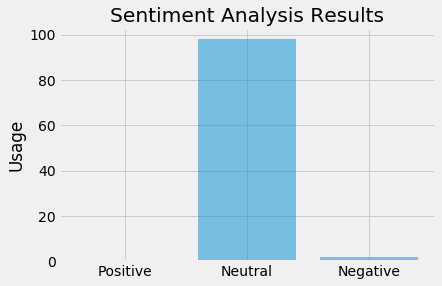

In [75]:
# Plot
levels = ('Positive', 'Neutral', 'Negative')
y_pos = np.arange(len(levels))
performance = [positive, neutral, negative]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, levels)
plt.ylabel('Usage')
plt.title('Sentiment Analysis Results')

plt.show()